<a href="https://colab.research.google.com/github/Shantanu9326/Human-Activity-Recognition-Using-Smartphones/blob/master/Human_Activity_Recognition_using_Smartphones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Task A: Understanding the data

### What is the objective of the data collection process?

The main objective is to use built-in sensor information collected by smartphone’s accelerometer and gyroscope to recognize six different type of activities of daily living. 

### What human activity types does this dataset have? How many subjects/people have performed these activities?

The human activity types are:

i.	Standing

ii.	Sitting

iii.	Laying Down

iv.	Walking

v.	Walking downstairs

vi.	Walking upstairs

A total of 30 volunteers with ages ranging from 19 to 48 have performed these activities.

### How many instances are available in the training and test sets? How many features are used to represent each instance? Summarize the type of features extracted in 2-3 sentences.

The whole dataset of 10,299 instances was split into 7,352 instances in the train set and 2,947 instances in the test set. 

A total of 561 features were extracted to describe each of the instances. The features are basically different statistical measures of the 17 different types of time and frequency domain signals collected from the smartphone accelerometer and gyroscope. These include gravitational and body acceleration related signals like Body Acc Magnitude, Gravity Acc Mag, Body Acc Jerk etc.

### What machine learning model is used in this paper for activity recognition and how is it trained. How much is the maximum accuracy achieved?

The machine learning model used in this paper for activity recognition is the Support Vector Machine Model with Gaussian Kernels. The model was trained on 7,352 instances of training dataset with a 10-fold cross validation. The model achieved a very high accuracy of 96% on the test set of 2,947 instances, with the perfect accuracy for activity ‘Laying Down’- which was 100%. However, it is also to be noted that there were noticeable misclassification overlap between the activity “Sitting” and “Standing”- indicating that the model struggled to correctly distinguish between these two activities.


Before applying necessary models, all the relevant modules have been imported as below

In [4]:
#Running or Importing .py Files with Google Colab
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
# Standard Modules
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Visualisation
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits import mplot3d

# Preprocessing
from sklearn import preprocessing

# Model Development
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier

# Evaluation
from sklearn.model_selection import cross_val_score
from sklearn import metrics


In the cell below, all relevent datasets have been read using pandas dataframe and stored as numpy arrays for model building

In [0]:
##Preparing the dataset

#Importing training and testing dataset
X_test = pd.read_table('/content/drive/My Drive/app/test/X_test.txt', sep= '\s+', header= None).values
y_test = pd.read_table('/content/drive/My Drive/app/test/y_test.txt', sep= '\s+', header= None).values
X_train = pd.read_table('/content/drive/My Drive/app/train/X_train.txt', sep= '\s+', header= None).values
y_train = pd.read_table('/content/drive/My Drive/app/train/y_train.txt', sep= '\s+', header= None).values
#Importing feature names
features = pd.read_table('/content/drive/My Drive/app/features.txt', sep= '\s+', header = None)
feature_names = np.reshape(features[1].values,(1,561))
#Importing label names
labels = pd.read_table('/content/drive/My Drive/app/activity_labels.txt', sep= '\s+', header = None)
activity_names = labels[1].values.ravel()

Some models learn better with normalized data. Both training set and testing set has been z-transformed using the same scale in the cell below

In [0]:
## Preprocessing

# Standardizing the data based on Z-transformation for using in SVC and Elastic Net Logistic Regression

# Storing the mean and standard deviation to later apply on new test dataset so that we can maintain distribution properties
scaler = preprocessing.StandardScaler().fit(X_train)
# Transforming training dataset based on stored scaler
X_train_transformed = scaler.transform(X_train)
# Transforming testing dataset based on stored scaler
X_test_transformed = scaler.transform(X_test)

## Task B: Build a K-Nearest Neighbor classifier for this data

### Criteria: Let K take values from 1 to 50. For choosing the best K, use 10-fold cross-validation. Choose the best value of K based on model F1-score

This task has been completed below:

For scoring each fold of cross validation, F1_weighted scoring method has been applied which used weighted average of each class F1 score to account for any class imbalance.

Also in order to draw a accuracy plot later on, another cross validation has been conducted based on the accuracy scores.

We can see that the optimnum K-value that gives the highest F1 score is 10

In [8]:
# Instantiating Parameters and lists

CV_fold = 10
k_list = list(range(1,51))
knn_avg_f1_scores = []
knn_avg_acc = []

#Iterating the model for different F1 and accuracy scores for each K
for k in range(50):
    knn = KNeighborsClassifier(n_neighbors = k_list[k])
    # Calculating F1 score with weighted averaging for each iteration to account for any class imbalance 
    knn_f1_scores = cross_val_score(knn, X_train, y_train.ravel(), scoring = 'f1_weighted', cv = CV_fold, n_jobs= -1)
    # Calculating accuracy scores for each iteration
    knn_acc_scores = cross_val_score(knn, X_train, y_train.ravel(), scoring = 'accuracy', cv = CV_fold, n_jobs= -1)
    # Averaging f1 score for all 10 folds
    knn_average_f1_score = knn_f1_scores.mean()
    # Averaging accuracy score for all 10 folds
    knn_average_acc = knn_acc_scores.mean()
    # Appending average scores to the list
    knn_avg_f1_scores= np.append(knn_avg_f1_scores, knn_average_f1_score)
    knn_avg_acc= np.append(knn_avg_acc, knn_average_acc)
    
# K at which f1 score is maximum
max_index_knn  = np.argmax(knn_avg_f1_scores)
knn_best_k = k_list[max_index_knn]

print(f"Best K for KNN based on F1 score is: {knn_best_k}")

Best K for KNN based on F1 score is: 10


### Criteria: Show a plot of cross-validation accuracy with respect to K

This has been drawn in the chart below. 

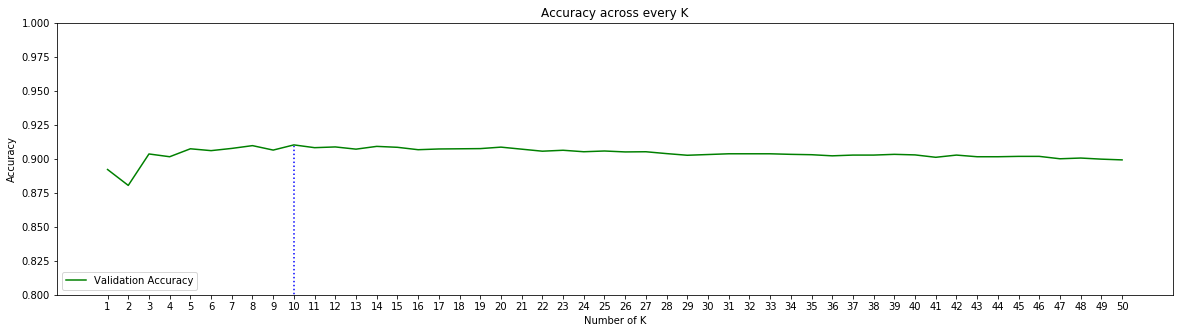

In [11]:
#plot the accuracy curve
plt.figure(figsize=(20,5))
plt.plot(range(0,len(k_list)), knn_avg_acc, color='g', label='Validation Accuracy')
#replace the x-axis labels with k
plt.xticks(range(0,len(k_list)), k_list, rotation='horizontal')

#Highlight the best values of alpha based on F1 score
plt.plot((max_index_knn, max_index_knn), (0, knn_avg_f1_scores[max_index_knn]), ls='dotted', color='b')

#Set the y-axis from 0 to 1.0
axes = plt.gca()
axes.set_ylim([.8, 1.0])

plt.legend(loc="lower left")
plt.xlabel('Number of K')
plt.ylabel('Accuracy')
plt.title('Accuracy across every K')
plt.show()

**Explanation:**
We can see that even though uptill K = 5, the accuracy flactuates a bit, after 5 number of neighbors, the accuracy doesn't flactuate at all, and slowly starts decreasing after the optimum K value of 10.

### Criteria: Using the best K value, evaluate the model performance on the supplied test set. Report the confusion matrix, multi-class averaged F1-score and accuracy.

Using the best K value of 10, model has been retrained on the full training set and the performanced has been measured on test set as below:

In [12]:
# Fitting the best model on training dataset and predicting the test dataset
knn_best = KNeighborsClassifier(n_neighbors = knn_best_k)
knn_best.fit(X_train,y_train.ravel())
knn_y_pred = knn_best.predict(X_test)

# Reporting Performance
knn_best_cm = metrics.confusion_matrix(knn_y_pred, y_test.ravel())
print('Confusion Matrix:')
print(knn_best_cm)

knn_best_acc = metrics.accuracy_score(knn_y_pred, y_test.ravel())
print(f'\nThe average accuracy of the model is: {knn_best_acc}')

print('Multi-class performance: \n')
print(metrics.classification_report(knn_y_pred, y_test.ravel(), target_names = activity_names))

Confusion Matrix:
[[486  36  51   0   0   0]
 [  0 431  41   4   0   0]
 [ 10   4 328   0   0   0]
 [  0   0   0 409  47   2]
 [  0   0   0  78 485   2]
 [  0   0   0   0   0 533]]

The average accuracy of the model is: 0.9066847641669494
Multi-class performance: 

                    precision    recall  f1-score   support

           WALKING       0.98      0.85      0.91       573
  WALKING_UPSTAIRS       0.92      0.91      0.91       476
WALKING_DOWNSTAIRS       0.78      0.96      0.86       342
           SITTING       0.83      0.89      0.86       458
          STANDING       0.91      0.86      0.88       565
            LAYING       0.99      1.00      1.00       533

          accuracy                           0.91      2947
         macro avg       0.90      0.91      0.90      2947
      weighted avg       0.91      0.91      0.91      2947



**Explanation:**
As we can see from the performance report above, even though the model scored an overall accuracy of just above 90%, it was relatively less precise in recognizing two activities- Walking Downstairs and Sitting.

## Task C: Multiclass Logistic Regression with Elastic Net

### Criteria: For L1 model, choose the best alpha value and L1 ratio

The same Cross Validation Method (as mentioned previously) as been applied with all possible combinations of given alpha value and L1 ratio as below:

In [13]:
CV_fold = 10
alpha_vals = [0.0001,0.0003,0.001,0.003,0.01,0.03]
l1_ratio = [0,.15,.5,.7,1]

# Instantiating required lists
lr_avg_f1_scores = []
lr_alpha = []
lr_l1_ratio = []

#Iterating the model for different F1 scores for each hyper-parameter
for alpha in alpha_vals:
    for ratio in l1_ratio:
        lr_alpha = np.append(lr_alpha, alpha)
        lr_l1_ratio = np.append(lr_l1_ratio, ratio)
        lr= SGDClassifier(loss= 'log', penalty= 'elasticnet', alpha = alpha, l1_ratio = ratio, random_state= 2018)
        lr_f1_scores= cross_val_score(lr, X_train_transformed, y_train.ravel(), scoring = 'f1_weighted', cv = CV_fold, n_jobs= -1)
        lr_average_f1_score = lr_f1_scores.mean()
        lr_avg_f1_scores = np.append(lr_avg_f1_scores, lr_average_f1_score)
        
# Parameters at which f1 score is maximum
max_index_lr  = np.argmax(lr_avg_f1_scores)
lr_best_alpha = lr_alpha[max_index_lr]
lr_best_l1_ratio = lr_l1_ratio[max_index_lr]

print(f"Best Alpha: {lr_best_alpha}")
print(f"Best L1 Ratio: {lr_best_l1_ratio}")

Best Alpha: 0.0001
Best L1 Ratio: 0.5


**Explanation:** The best alpha value that gives the highest F1 score is 0.0001 and the best L1 ratio 0.5.

### Criteria: Draw a surface plot of F1- score with respect to alpha and L1-ratio values

In the following code snippet, the surface plot has been drawn with Alpha values in X axis, L1_ratio in Y axis and F1_score as the Z axis.

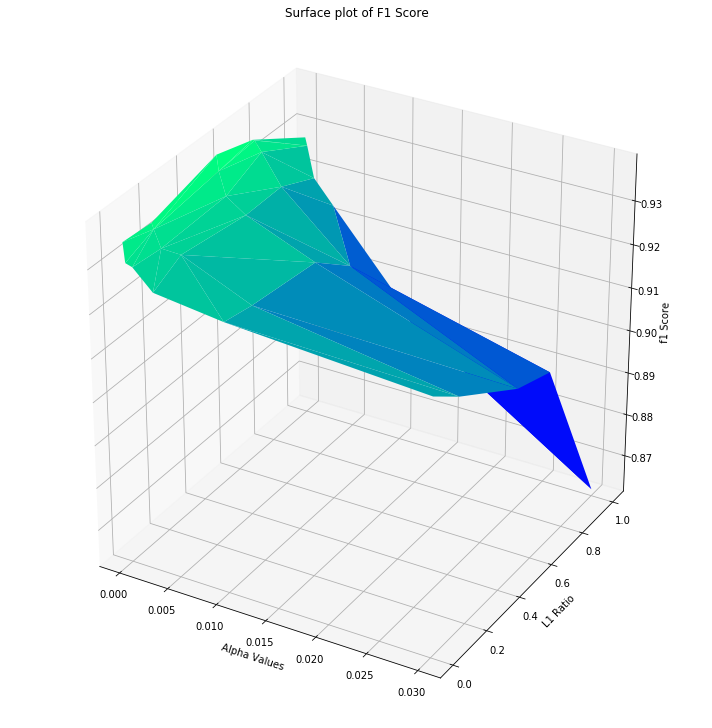

In [14]:
# Drawing the surface plot

fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection= '3d')

ax.plot_trisurf(lr_alpha, lr_l1_ratio, lr_avg_f1_scores, cmap = 'winter', linewidth = 0)
ax.set_xlabel('Alpha Values')
ax.set_ylabel('L1 Ratio')
ax.set_zlabel('f1 Score')
fig.tight_layout()

plt.title('Surface plot of F1 Score')
plt.show()

**Explanation:**
From the above surface plot we can see that the F1 accuracy increases as Alpha value gets smaller, whereas it is maximum when we have a medium value for L1 ratio.

### Criteria: Train the model with best alpha and L1-ratio values and report the prediction performance on test data

The best alpha values and L1_ratio has been applied on the final model to train and test the given datasets.

In [15]:
# Using the best value of Alpha and L1 ratio to retrain the model

lr_best = SGDClassifier(loss= 'log', penalty= 'elasticnet', alpha = lr_best_alpha, l1_ratio = lr_best_l1_ratio, max_iter=5, random_state= 2018)
lr_best.fit(X_train_transformed,y_train.ravel())
lr_y_pred = lr_best.predict(X_test_transformed)

lr_best_cm = metrics.confusion_matrix(lr_y_pred, y_test.ravel())
print('Confusion Matrix:')
print(lr_best_cm)

lr_best_acc = metrics.accuracy_score(lr_y_pred, y_test.ravel())
print(f'\nThe average accuracy of the model is: {lr_best_acc}')

print('Multi-class performance: \n')
print(metrics.classification_report(lr_y_pred, y_test.ravel(), target_names = activity_names))

Confusion Matrix:
[[491  36  15   0   0   0]
 [  1 434  16   2   0   0]
 [  4   1 389   0   0   0]
 [  0   0   0 408  17   0]
 [  0   0   0  81 515  25]
 [  0   0   0   0   0 512]]

The average accuracy of the model is: 0.9328130302002036
Multi-class performance: 

                    precision    recall  f1-score   support

           WALKING       0.99      0.91      0.95       542
  WALKING_UPSTAIRS       0.92      0.96      0.94       453
WALKING_DOWNSTAIRS       0.93      0.99      0.96       394
           SITTING       0.83      0.96      0.89       425
          STANDING       0.97      0.83      0.89       621
            LAYING       0.95      1.00      0.98       512

          accuracy                           0.93      2947
         macro avg       0.93      0.94      0.93      2947
      weighted avg       0.94      0.93      0.93      2947



**Explanation:**
We can see that the elastic net performed relatively better than KNN model with higher overall accuracy (94%). It is also struggling with recognizing Sitting and Standing activities with relatively lower precision in Sitting and lower recall in Standing activity.

## Task D: Support Vector Machine (RBF Kernel)

### Criteria: Choose the best values of gamma and C using 10-fold cross-validation, based on model F1-score

In the following code snippet, the optimum gamma and C-using 10-fold CV has been identified. The values are respectively 0.0001 and 1000.

In [16]:
CV_fold = 10
svc_gamma_vals = [0.001,0.0001]
svc_c_cost = [1,10,100,1000]

# Instantiating required lists
svc_avg_f1_scores = []
svc_gamma = []
svc_c = []

#Iterating the model for different F1 and accuracy scores for each K
for gamma in svc_gamma_vals:
    for c in svc_c_cost:
        svc_gamma = np.append(svc_gamma, gamma)
        svc_c = np.append(svc_c, c)
        svc= svm.SVC(kernel='rbf',C= c, gamma = gamma, random_state = 2018)
        svc_f1_scores= cross_val_score(svc, X_train_transformed, y_train.ravel(), scoring = 'f1_weighted', cv = CV_fold, n_jobs= -1)
        svc_average_f1_score = svc_f1_scores.mean()
        svc_avg_f1_scores = np.append(svc_avg_f1_scores, svc_average_f1_score)
        
# Parameters at which f1 score is maximum
max_index_svc  = np.argmax(svc_avg_f1_scores)
svc_best_gamma = svc_gamma[max_index_svc]
svc_best_c = svc_c[max_index_svc]

print(f"Best Gamma: {svc_best_gamma}")
print(f"Best C: {svc_best_c}")

Best Gamma: 0.0001
Best C: 1000.0


### Criteria: Draw a surface plot of F1-score with respect to gamma and C

In the surface plot drawn below, X-axis is denoted by Gamma values, Y axis is denoted by C values and Z-axis is denoted by F1 scores.

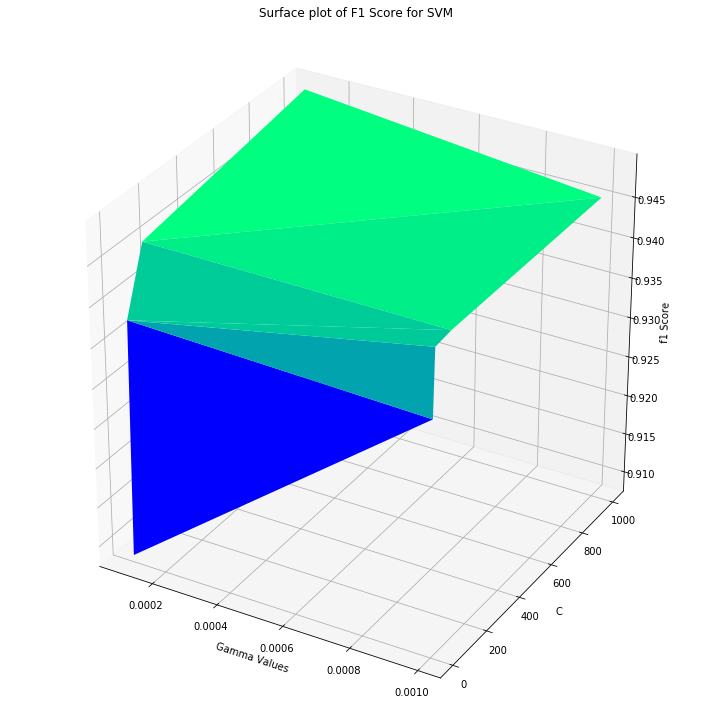

In [17]:
# Drawing the surface plot

fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection= '3d')

ax.plot_trisurf(svc_gamma, svc_c, svc_avg_f1_scores, cmap = 'winter', linewidth = 0)
ax.set_xlabel('Gamma Values')
ax.set_ylabel('C')
ax.set_zlabel('f1 Score')
fig.tight_layout()


#plt.zlabel('F1 Score')
plt.title('Surface plot of F1 Score for SVM')
plt.show()

**Explanation:**

We can see from the surface plot that as gamma value decreases, the F1 score slightly improves.

### Criteria: Report the performance of trained model on test data.



In [18]:
# Using the best value of Gamma and C ratio to retrain the model

svc_best= svm.SVC(kernel='rbf',C= svc_best_c, gamma = svc_best_gamma, random_state = 2018, max_iter=1000000)
svc_best.fit(X_train_transformed,y_train.ravel())
svc_y_pred = svc_best.predict(X_test_transformed)


svc_best_cm = metrics.confusion_matrix(svc_y_pred, y_test.ravel())
print('Confusion Matrix:')
print(svc_best_cm)

svc_best_acc = metrics.accuracy_score(svc_y_pred, y_test.ravel())
print(f'\nThe average accuracy of the model is: {svc_best_acc}')

print('Multi-class performance: \n')
print(metrics.classification_report(svc_y_pred, y_test.ravel(), target_names = activity_names))

Confusion Matrix:
[[493  16   5   0   0   0]
 [  0 453  17   2   0   0]
 [  3   2 398   0   0   0]
 [  0   0   0 435  15   0]
 [  0   0   0  54 517   0]
 [  0   0   0   0   0 537]]

The average accuracy of the model is: 0.9613165931455717
Multi-class performance: 

                    precision    recall  f1-score   support

           WALKING       0.99      0.96      0.98       514
  WALKING_UPSTAIRS       0.96      0.96      0.96       472
WALKING_DOWNSTAIRS       0.95      0.99      0.97       403
           SITTING       0.89      0.97      0.92       450
          STANDING       0.97      0.91      0.94       571
            LAYING       1.00      1.00      1.00       537

          accuracy                           0.96      2947
         macro avg       0.96      0.96      0.96      2947
      weighted avg       0.96      0.96      0.96      2947



**Explanation:**

We can see from the above performance report that SVM model performs better than the previous two models applied. Similar to the result published in the previously mentioned report, the accuracy on final test data is 96%. However the model strugles to distinguish between sitting activity and standing activity. 

## Task E: Random Forest

### Criteria: Choose the best values of tree-depth and number of trees.

In the code snippet, a cross validation with 10 fold has been applied for different Random Forest ensembles with the specified parameters to find the optimum depth of 300 and number of trees of 200.

In [19]:
CV_fold = 10
rf_depth_vals = [300,500,600]
rf_trees_vals = [200,500,700]

# Instantiating required lists
rf_avg_f1_scores = []
rf_depth = []
rf_trees = []

#Iterating the model for different F1 scores for each combination of depth and trees
for depth in rf_depth_vals:
    for trees in rf_trees_vals:
        rf_depth = np.append(rf_depth, depth)
        rf_trees = np.append(rf_trees, trees)
        rf= RandomForestClassifier(n_estimators = trees, max_depth = depth, random_state = 2018)
        rf_f1_scores= cross_val_score(rf, X_train, y_train.ravel(), scoring = 'f1_weighted', cv = CV_fold)
        rf_average_f1_score = rf_f1_scores.mean()
        rf_avg_f1_scores = np.append(rf_avg_f1_scores, rf_average_f1_score)
        
# Parameters at which f1 score is maximum
max_index_rf  = np.argmax(rf_avg_f1_scores)
rf_best_trees = rf_trees[max_index_rf]
rf_best_depth = rf_depth[max_index_rf]

print(f"Best Depth: {rf_best_depth}")
print(f"Best Trees: {rf_best_trees}")

Best Depth: 300.0
Best Trees: 200.0


### Criteria: Draw a surface plot of F1-score with respect to tree-depth and number of trees.

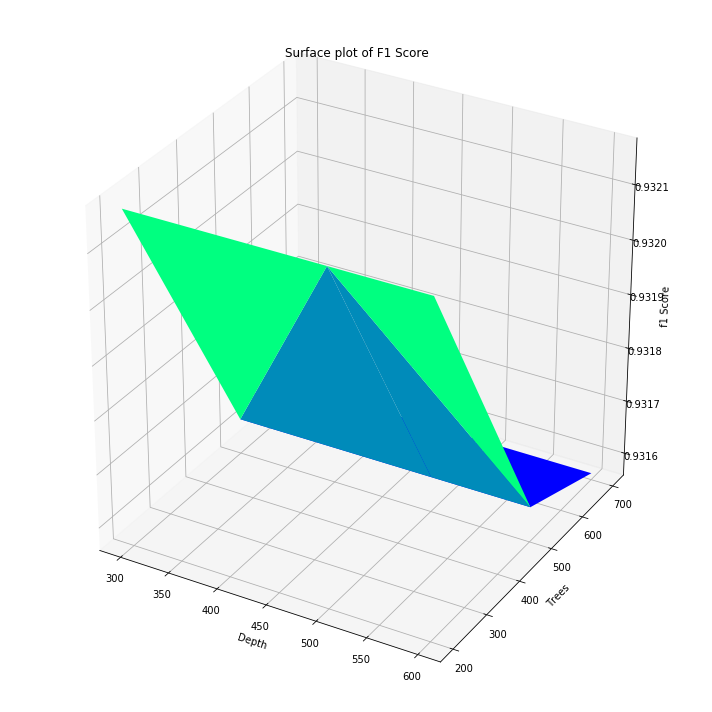

In [20]:
# Drawing the surface plot

fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection= '3d')

ax.plot_trisurf(rf_depth, rf_trees, rf_avg_f1_scores, cmap = 'winter', linewidth = 0)
ax.set_xlabel('Depth')
ax.set_ylabel('Trees')
ax.set_zlabel('f1 Score')
plt.title('Surface plot of F1 Score')
fig.tight_layout()
plt.show()

**Explanation:**

We can see from the above chart that as number of trees increases, the F1 accuracy of the model actually decreases, and also for lower depth, we get better F1-score.

### Criteria: Report performance of trained model on test data

Based on the optimum Depth and number of trees, the random forest tree has been retrained as below on the full training dataset.

In [21]:
# Using the best value of depth and number of trees to retrain the model and reporting performances

print("Building the model based on best hyper-parameters>>> \n")

rf_best= RandomForestClassifier(n_estimators = int(rf_best_trees), max_depth = rf_best_depth, random_state = 2018)
rf_best.fit(X_train,y_train.ravel())
rf_y_pred = rf_best.predict(X_test)

print('Model Built on training dataset \n')
print('Testing on the test dataset>>> \n')
print('The multi-class confusion matrix is: \n')
rf_best_cm = metrics.confusion_matrix(rf_y_pred, y_test.ravel())
print(rf_best_cm)
rf_best_acc = metrics.accuracy_score(rf_y_pred, y_test.ravel())
print(f'\nThe average accuracy of the model is: {rf_best_acc}')
print('Multi-class performance: \n')
print(metrics.classification_report(rf_y_pred, y_test.ravel(), target_names = activity_names))

Building the model based on best hyper-parameters>>> 

Model Built on training dataset 

Testing on the test dataset>>> 

The multi-class confusion matrix is: 

[[483  33  22   0   0   0]
 [  4 432  43   0   0   0]
 [  9   6 355   0   0   0]
 [  0   0   0 439  44   0]
 [  0   0   0  52 488   0]
 [  0   0   0   0   0 537]]

The average accuracy of the model is: 0.9277231082456736
Multi-class performance: 

                    precision    recall  f1-score   support

           WALKING       0.97      0.90      0.93       538
  WALKING_UPSTAIRS       0.92      0.90      0.91       479
WALKING_DOWNSTAIRS       0.85      0.96      0.90       370
           SITTING       0.89      0.91      0.90       483
          STANDING       0.92      0.90      0.91       540
            LAYING       1.00      1.00      1.00       537

          accuracy                           0.93      2947
         macro avg       0.92      0.93      0.93      2947
      weighted avg       0.93      0.93      0.93

**Explanation:**

Based on the performance scores we can see that Random Forest Classifier did not perform as high as SVC with RBF kernel. It also has relatively lower precision score for recognizing Sitting activity and Walking Downstairs activity.

## Task F: Discussion

### Which Classification Method achieved the best performance?

Based on the analysis above, we can see that Support Vector Machines with RBF kernels (Gamma = 0.0001, C = 1000) performed the best among all classifiers tested, with 96.1% overall accuracy.

### What Method performed the worst?

K-NN model performed the worst among all with 90.6% accuracy.

### Comparison with the results in dataset paper

As mentioned in the dataset, the researchers were able to achieve maximum of 96% accuracy with implementation of SVC model. We achieved a similar performance using the SVC model with RBF kernel. Therefore model performance could not be improved from the original research paper with the specified set of hyper-parameters.

### Suggestions to further improve the model

#### Optimization of the model: 
For implementing the SVC model on the dataset, only 8 combinations of different hyper parameters were used (2 gamma values and 4 C values). In order to further optimize the model and get even better performance, we need to evaluate many more combinations of Gamma and C values. We can also evaluate more SVC related hyper-paremeters like Tolerance Level and try increasing the max-iteration number to converge the model further.

#### Implementation of Sequential Neural Networks (RNNs or LSTMs):
Since there is normally sequential patterns in human activity (for example, walking-standing-sitting-lying normally follows a sequential pattern, we can attempt implementing more sophisticated deep neural networks like RNNs or LSTMs to get better performance for human activity recognition.

**The End**